<a href="https://colab.research.google.com/github/aks3213/009_AkshayBhanderi/blob/main/Lab_08_K_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing modules

import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
#preparing dataset

dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


In [4]:
#k - mean model

kmeans = KMeans(n_clusters=10, random_state=9)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[1 1 8 2 8 0 8 0 0 0 6 3 3 6 0 6 6 3 4 0 2 7 6 4 4 3 6 3 3 3 8 0 3 1 3 3 0
 2 0 0 0 2 8 0 0 8 7 0 2 0 2 0 2 3 6 2 1 6 2 7 7 7 6 7 0 6 7 2 7 2 1 7 8 0
 2 3 2 8 8 2 2 2 5 3 2 8 0 8 2 0 0 0 0 0 6 8 2 7 2 0 0 7 2 7 7 0 2 2 4 2 7
 2 0 7 7 2 7 6 3 3 2 8 1 0 2 0 0 8 0 8 2 6 3 6 8 2 2 2 6 7 7 3 2 2 7 2 2 0
 0 0 2 7 7 7 0 2 3 6 2 2 2 8 4 2 4 0 7 3 8 0 2 6 6 7 7 7 7 6 2 2 5 1 3 2 6
 7 3 2 2 2 0 2 7 0 0 2 0 3 8 6 2 3 1 6 2 6 7 3 2 6 8 2 5 6 0 0 2 7 1 4 0 0
 7 6 0 0 7 0 2 0 3 2 2 1 7 0 5 1 0 3 0 2 2 0 8 7 2 2 7 2 1 2 1 3 1 0 1 6 3
 6 1 3 3 6 3 5 7 0 2 7 0 2 4 7 3 2 2 3 0 0 8 2 8 6 2 2 2 2 7 2 0 0 2 2 2 0
 7 2 0 7 1 2 8 7 2 2 2 7 0 0 2 0 2 2 7 2 2 8 7 2 7 8 2 1 2 2 0 2 6 6 6 2 7
 2 2 3 2 1 7 5 0 7 7 8 2 7 2 6 2 2 2 6 5 6 2 2 2 0 7 7 2 2 2 6 0 1 8 2 5 4
 3 0 8 1 0 6 7 0 0 2 2 7 2 2 2 0 2 0 2 3 7 7 3 1 2 0 0 2 2 2 3 2 2 2 2 2 6
 2 3 2 2 2 7 6 6 2 7 8 2 2 2 0 2 0 7 7 7 2 7 2 0 2 8 8 0 0 2 0 0 0 2 3 0 7
 3 2 3 0 0 1 2 8 2 0 2 0 2 2 2 7 8 9 0 2 0 0 0 7 3 2 7 2 6 2 7 2 0 0 2 6 2
 0 0 0 6 2 0 8 2 6 2 3 3 

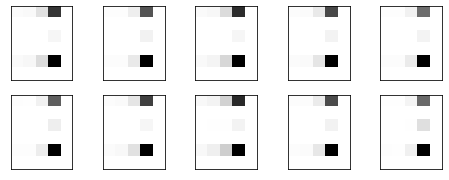

In [5]:
#scatter plot of data points

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)



In [6]:
from scipy.stats import mode

labels = np.zeros_like(prediction)

for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(dataset.target, labels)

0.9068541300527241

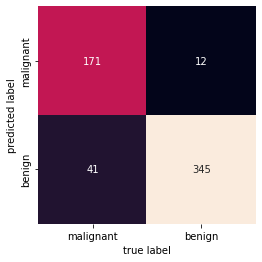

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');